In [62]:
import pandas as pd
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [75]:
stat22 = pitching_stats(2022,qual=20)
stat23 = pitching_stats(2023)
stat24 = pitching_stats(2024)

In [34]:
stat23.columns.tolist()

['IDfg',
 'Season',
 'player_name',
 'Team',
 'Age',
 'W',
 'L',
 'WAR',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'Relieving',
 'Relief-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB% 2',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 

In [76]:
def reformat_name(name):
    parts = name.split()
    if len(parts) == 3:
        first, middle, last = parts
        return f"{middle} {last}, {first}"
    if len(parts) == 2:
        first, last = parts
        return f"{last}, {first}"
    

stat22['Name'] = stat22['Name'].apply(reformat_name)
stat23['Name'] = stat23['Name'].apply(reformat_name)
stat24['Name'] = stat24['Name'].apply(reformat_name)

stat22 = stat22.rename(columns={
    'Name': 'player_name'
})

stat23 = stat23.rename(columns={
    'Name': 'player_name'
})

stat24 = stat24.rename(columns={
    'Name': 'player_name'
})

In [77]:
scores = pd.read_csv("pitch_scores_testing_24.csv")

#scores = pd.read_csv("pitch_scores.csv")

joined_data_22 = stat22.merge(scores,how='left',on='player_name')
joined_data_23 = stat23.merge(scores,how='left',on='player_name')
joined_data_24 = stat24.merge(scores,how='left',on='player_name')
joined_data_24

,IDfg,Season,player_name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FO,overall,fastball,sinker,cutter,slider,sweeper,curveball,changeup,splitter
0,19879,2024,"Houck, Tanner",BOS,28,7,5,3.4,2.14,15,...,NaN,99.35,96.42,100.36,98.21,100.85,0.00,0.00,0.00,95.27
1,27463,2024,"Crochet, Garrett",CHW,25,6,6,2.9,3.25,16,...,NaN,100.88,100.50,0.00,0.00,100.60,0.00,0.00,105.65,0.00
2,17277,2024,"Suarez, Ranger",PHI,28,10,1,2.8,1.75,15,...,NaN,99.02,96.19,101.16,101.12,99.07,0.00,101.25,95.30,0.00
3,10603,2024,"Sale, Chris",ATL,35,10,2,2.8,2.91,14,...,NaN,94.66,95.13,102.35,0.00,93.29,0.00,0.00,93.39,0.00
4,21846,2024,"Ragans, Cole",KCR,26,4,5,2.7,3.13,16,...,NaN,103.12,101.15,0.00,99.25,105.89,0.00,109.41,104.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,16561,2024,"Gomber, Austin",COL,30,1,4,0.2,4.36,14,...,NaN,99.22,94.02,97.26,0.00,102.27,0.00,101.64,106.38,0.00
72,11423,2024,"Quintana, Jose",NYM,35,3,5,0.1,4.58,15,...,NaN,93.61,97.24,93.83,0.00,0.00,0.00,96.34,84.58,0.00
73,19206,2024,"Hudson, Dakota",COL,29,2,10,0.1,5.63,15,...,NaN,97.54,95.70,99.61,0.00,96.57,0.00,97.20,95.73,0.00
74,19867,2024,"Canning, Griffin",LAA,28,2,8,0.0,5.02,15,...,NaN,100.09,95.61,95.93,0.00,102.90,0.00,102.53,102.08,0.00


-0.5032085873516358
-0.5032085873516358


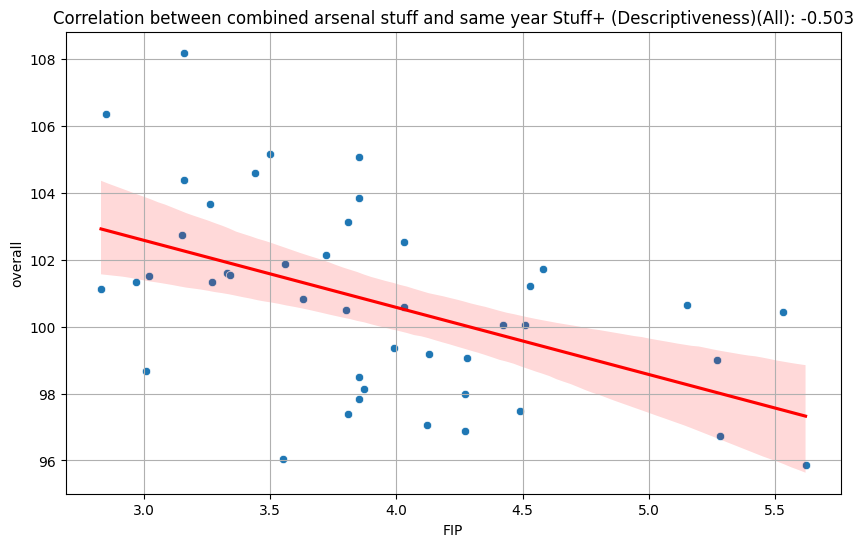

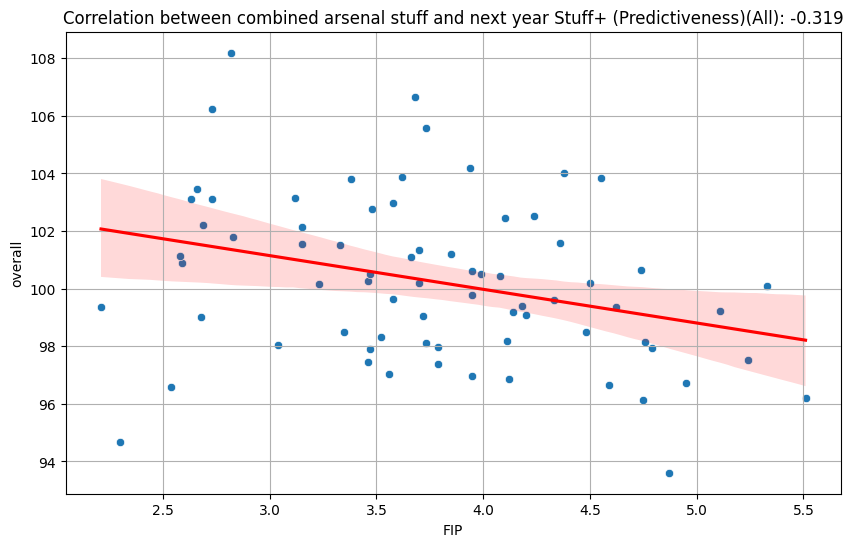

In [78]:
def filter_pitch(df, pitch):
    return df[df[pitch] > 0]

# Variables for analysis
stat = 'FIP'
pitch = 'overall'

# Filter data
filtered_data_22 = filter_pitch(joined_data_22, pitch)
filtered_data_23 = filter_pitch(joined_data_23, pitch)
filtered_data_24 = filter_pitch(joined_data_24, pitch)

# Calculate correlations
correlation_23 = filtered_data_23[stat].corr(filtered_data_23[pitch])
correlation_24 = filtered_data_24[stat].corr(filtered_data_24[pitch])

print(correlation_23)
print(correlation_23)


# Plot descriptive correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_23)
sns.regplot(x=stat, y=pitch, data=filtered_data_23, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and same year Stuff+ (Descriptiveness)(All): {correlation_23:.3f}")
plt.grid(True)
plt.savefig('descriptive.png')

# Plot predictive correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_24)
sns.regplot(x=stat, y=pitch, data=filtered_data_24, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and next year Stuff+ (Predictiveness)(All): {correlation_24:.3f}")
plt.grid(True)
plt.savefig('predictive.png')

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming joined_data_23 and joined_data_24 are already loaded

def print_data_summary(data, stat, pitch):
    print(f"\nData summary for {stat} and {pitch}:")
    print(f"Number of rows: {len(data)}")
    print(f"Number of non-null values in {stat}: {data[stat].count()}")
    print(f"Number of non-null values in {pitch}: {data[pitch].count()}")
    print(f"Correlation: {data[stat].corr(data[pitch])}")
    print(f"First few rows:")
    print(data.head())
    print("\n")

# Aligned lists of stats and pitches
stat_pitch_pairs = [
    ('Stf+ FA', 'fastball'),
    ('Stf+ SI', 'sinker'),
    ('Stf+ FC', 'cutter'),
    ('Stf+ SL', 'slider'),
    ('Stf+ CU', 'curveball'),
    ('Stf+ CH', 'changeup'),
    ('Stf+ FS', 'splitter'),
    ('botStf FA', 'fastball'),
    ('botStf SI', 'sinker'),
    ('botStf FC', 'cutter'),
    ('botStf SL', 'slider'),
    ('botStf CU', 'curveball'),
    ('botStf CH', 'changeup'),
    ('botStf FS', 'splitter')
]

results = []

for stat, pitch in stat_pitch_pairs:
    # Check if both columns exist in the dataframes
    if stat in joined_data_23.columns and pitch in joined_data_23.columns and \
       stat in joined_data_24.columns and pitch in joined_data_24.columns:
        
        # Remove rows with NaN values for this stat-pitch pair
        clean_data_23 = joined_data_23[[stat, pitch]].dropna()
        clean_data_24 = joined_data_24[[stat, pitch]].dropna()
        
        # Print detailed data summary
        print_data_summary(clean_data_23, stat, pitch)
        
        # Only proceed if we have enough data
        if len(clean_data_23) > 1 and len(clean_data_24) > 1:
            # Calculate correlations
            correlation_23 = clean_data_23[stat].corr(clean_data_23[pitch])
            correlation_24 = clean_data_24[stat].corr(clean_data_24[pitch])
            
            # Perform Linear Regression for descriptive model (same year)
            X_23 = clean_data_23[pitch].values.reshape(-1, 1)
            y_23 = clean_data_23[stat].values
            model_23 = LinearRegression()
            model_23.fit(X_23, y_23)
            r_23 = model_23.score(X_23, y_23)
            
            # Perform Linear Regression for predictive model (next year)
            X_24 = clean_data_24[pitch].values.reshape(-1, 1)
            y_24 = clean_data_24[stat].values
            model_24 = LinearRegression()
            model_24.fit(X_24, y_24)
            r_24 = model_24.score(X_24, y_24)
            
            results.append({
                'Stat': stat,
                'Pitch': pitch,
                'Correlation_23': correlation_23,
                'R_squared_23': r_23,
                'Correlation_24': correlation_24,
                'R_squared_24': r_24,
                'Valid_Rows_23': len(clean_data_23),
                'Valid_Rows_24': len(clean_data_24)
            })
        else:
            print(f"Warning: Not enough valid data for {stat} and {pitch}. Skipping this pair.")
    else:
        print(f"Warning: Columns {stat} or {pitch} not found in one or both dataframes. Skipping this pair.")

# Convert results to a DataFrame for easy viewing and further analysis
results_df = pd.DataFrame(results)

# Display the results
print("\nResults:")
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('pitch_analysis_results.csv', index=False)

# Example: Find the stat-pitch pair with the highest descriptive correlation
if not results_df.empty:
    best_descriptive = results_df.loc[results_df['Correlation_23'].idxmax()]
    print(f"\nBest descriptive correlation: {best_descriptive['Stat']} for {best_descriptive['Pitch']}")

    # Example: Find the stat-pitch pair with the highest predictive R-squared
    best_predictive = results_df.loc[results_df['R_squared_24'].idxmax()]
    print(f"\nBest predictive R-squared: {best_predictive['Stat']} for {best_predictive['Pitch']}")
else:
    print("\nNo results to analyze. Please check your data and column names.")

# Manual correlation check for Stf+ FA and fastball
manual_corr = joined_data_23['Stf+ FA'].corr(joined_data_23['fastball'])
print(f"\nManual correlation check for Stf+ FA and fastball in 2023: {manual_corr}")


Data summary for Stf+ FA and fastball:
Number of rows: 590
Number of non-null values in Stf+ FA: 590
Number of non-null values in fastball: 590
Correlation: 0.5389943725151713
First few rows:
   Stf+ FA  fastball
0    112.0     97.83
1    141.0    107.78
2    110.0    100.82
3    105.0     98.09
4    104.0    100.79



Data summary for Stf+ SI and sinker:
Number of rows: 412
Number of non-null values in Stf+ SI: 412
Number of non-null values in sinker: 412
Correlation: 0.29121947252347546
First few rows:
   Stf+ SI  sinker
0    105.0   99.77
3     82.0   95.64
4     97.0  101.85
6     45.0   94.45
7    105.0   99.99



Data summary for Stf+ FC and cutter:
Number of rows: 237
Number of non-null values in Stf+ FC: 237
Number of non-null values in cutter: 237
Correlation: 0.10043672608403306
First few rows:
   Stf+ FC  cutter
0     96.0  101.78
3    118.0  100.48
4    106.0   99.94
5    107.0  102.63
8    100.0   99.66



Data summary for Stf+ SL and slider:
Number of rows: 562
Number of